In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import numpy as  np
import scipy
import pandas as pd

In [ ]:
# plt.plot(x_axis,susceptible/N,label='S',color='green')
#         plt.plot(x_axis,susceptible_q/N,label='Sq',color='blue')
#         plt.plot(x_axis,exposed/N,label='E',color='red')
#         plt.plot(x_axis,exposed_q/N,label='Eq',color='black')
#         plt.plot(x_axis,infected_u/N,label='Iu',color='brown')
#         plt.plot(x_axis,infected_q/N,label='Iq',color='cyan')
#         plt.plot(x_axis,infected_d/N,label='Id',color='orange')
#         plt.plot(x_axis,death/N,label='D',color='purple')
#         plt.plot(x_axis,recovered/N,label='R',color='magenta')

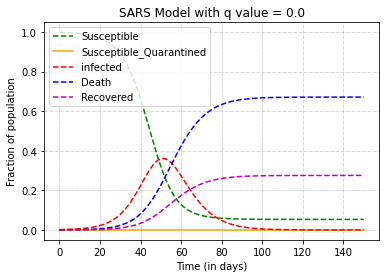

2.9999999999999996


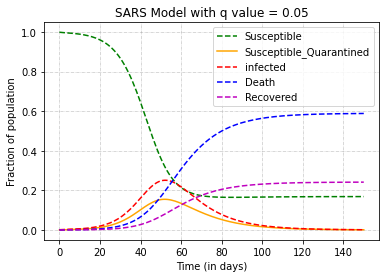

2.8499999999999996


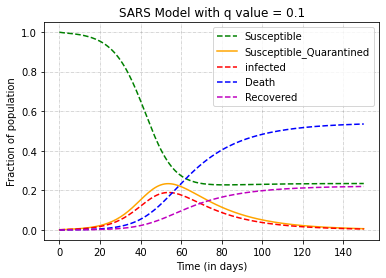

2.6999999999999997


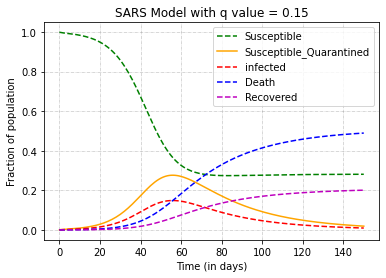

2.5499999999999994


In [19]:
# Q5
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625


q_values = np.arange(0,0.2,0.05)

for q in q_values:
        
        t_end = 150
        step_size = 1
        total_steps= int(t_end/step_size)+1 
        
        susceptible = np.zeros(total_steps)
        susceptible_q = np.zeros(total_steps)
        exposed = np.zeros(total_steps)
        exposed_q = np.zeros(total_steps)
        infected_q = np.zeros(total_steps)
        infected_u = np.zeros(total_steps)
        infected_d = np.zeros(total_steps)
        recovered = np.zeros(total_steps)
        death = np.zeros(total_steps)
        total = np.zeros(total_steps)
        N = 10000000
        susceptible[0] = N - 1e4
        infected_u[0] = 1e4

        for i in range(1,total_steps):
                susceptible[i] = susceptible[i-1] + (u*susceptible_q[i-1] - k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - k*q*b*infected_u[i-1]*susceptible[i-1]/N - k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N)*step_size
                susceptible_q[i] = susceptible_q[i-1] + (k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - u*susceptible_q[i-1])*step_size
                exposed[i] = exposed[i-1] + (k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed[i-1])*step_size
                exposed_q[i] = exposed_q[i-1] + (k*q*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed_q[i-1])*step_size
                infected_u[i] = infected_u[i-1] + (p*exposed[i-1] - m*infected_u[i-1] - v*infected_u[i-1] - w*infected_u[i-1])*step_size
                infected_d[i] = infected_d[i-1] + (w*infected_u[i-1] + w*infected_q[i-1] - v*infected_d[i-1] - m*infected_d[i-1])*step_size
                infected_q[i] = infected_q[i-1] + (p*exposed_q[i-1] - m*infected_q[i-1] - v*infected_q[i-1] - w*infected_q[i-1])*step_size
                death[i] = death[i-1] + m*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
                recovered[i] = recovered[i-1] + v*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
        
        x_axis=np.linspace(0,t_end,total_steps)
        net_ill = exposed/N + exposed_q/N + infected_u/N + infected_q/N + infected_d/N
        
        plt.plot(x_axis,susceptible/N ,'g--',label='Susceptible')
        plt.plot(x_axis,susceptible_q/N,'orange',label='Susceptible_Quarantined')
        
        plt.plot(x_axis,net_ill,'r--',label='infected')
        plt.plot(x_axis,death/N,'b--',label='Death')
        plt.plot(x_axis,recovered/N,'m--',label='Recovered')
        plt.legend()
        plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
        plt.xlabel('Time (in days)')
        plt.ylabel('Fraction of population')
        plt.title('SARS Model with q value = ' + str(round(q,2)))
        plt.show()
        print(k*b/(v+m+w)*(1-q))

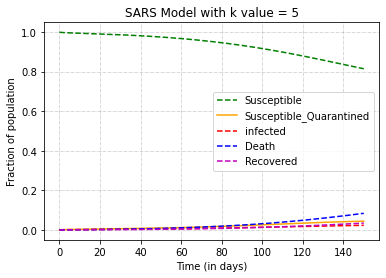

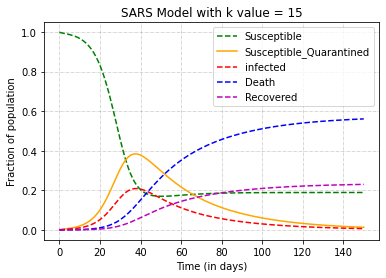

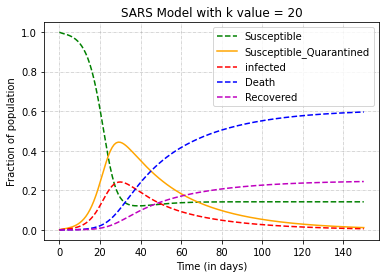

In [16]:
# Q6
b = 0.06 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
q= 0.15

k_values = [5,15,20]

for k in k_values:
        
        t_end = 150
        step_size = 1
        total_steps= int(t_end/step_size)+1 
        
        susceptible = np.zeros(total_steps)
        susceptible_q = np.zeros(total_steps)
        exposed = np.zeros(total_steps)
        exposed_q = np.zeros(total_steps)
        infected_q = np.zeros(total_steps)
        infected_u = np.zeros(total_steps)
        infected_d = np.zeros(total_steps)
        recovered = np.zeros(total_steps)
        death = np.zeros(total_steps)
        total = np.zeros(total_steps)
        N = 10000000
        susceptible[0] = N - 1e4
        infected_u[0] = 1e4

        for i in range(1,total_steps):
                susceptible[i] = susceptible[i-1] + (u*susceptible_q[i-1] - k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - k*q*b*infected_u[i-1]*susceptible[i-1]/N - k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N)*step_size
                susceptible_q[i] = susceptible_q[i-1] + (k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - u*susceptible_q[i-1])*step_size
                exposed[i] = exposed[i-1] + (k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed[i-1])*step_size
                exposed_q[i] = exposed_q[i-1] + (k*q*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed_q[i-1])*step_size
                infected_u[i] = infected_u[i-1] + (p*exposed[i-1] - m*infected_u[i-1] - v*infected_u[i-1] - w*infected_u[i-1])*step_size
                infected_d[i] = infected_d[i-1] + (w*infected_u[i-1] + w*infected_q[i-1] - v*infected_d[i-1] - m*infected_d[i-1])*step_size
                infected_q[i] = infected_q[i-1] + (p*exposed_q[i-1] - m*infected_q[i-1] - v*infected_q[i-1] - w*infected_q[i-1])*step_size
                death[i] = death[i-1] + m*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
                recovered[i] = recovered[i-1] + v*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
        
        x_axis=np.linspace(0,t_end,total_steps)
        net_ill = exposed/N + exposed_q/N + infected_u/N + infected_q/N + infected_d/N
        
        plt.plot(x_axis,susceptible/N ,'g--',label='Susceptible')
        plt.plot(x_axis,susceptible_q/N,'orange',label='Susceptible_Quarantined')
        plt.plot(x_axis,net_ill,'r--',label='infected')
        plt.plot(x_axis,death/N,'b--',label='Death')
        plt.plot(x_axis,recovered/N,'m--',label='Recovered')
        plt.legend()
        plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
        plt.xlabel('Time (in days)')
        plt.ylabel('Fraction of population')
        plt.title('SARS Model with k value = ' + str(round(k,2)))
        plt.show()

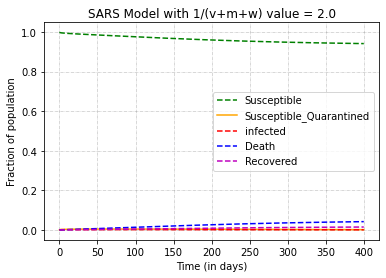

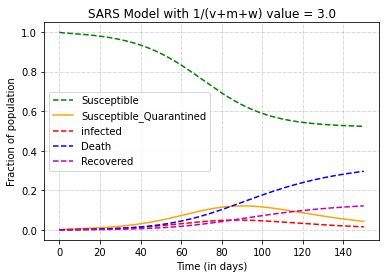

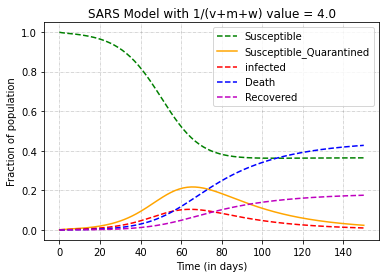

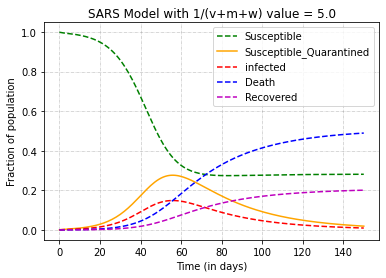

In [17]:
# Q7
b = 0.06 
N = 1e7
p = 0.2
u = 0.1
#(1,0.5,0.3333,0.25,0.2)
v = [0.08,0.0666,0.05,0.04]
m = [0.23,0.1625,0.1219,0.0975]
w = [0.19,0.1041,0.0781,0.0625]
q= 0.15
k = 10

for j in range(len(v)):
        if(round(1/(v[j]+m[j]+w[j]),2)<=2):
            t_end = 400
        else:
            t_end = 150
        step_size = 1
        total_steps= int(t_end/step_size)+1 
        
        susceptible = np.zeros(total_steps)
        susceptible_q = np.zeros(total_steps)
        exposed = np.zeros(total_steps)
        exposed_q = np.zeros(total_steps)
        infected_q = np.zeros(total_steps)
        infected_u = np.zeros(total_steps)
        infected_d = np.zeros(total_steps)
        recovered = np.zeros(total_steps)
        death = np.zeros(total_steps)
        total = np.zeros(total_steps)
        N = 10000000
        susceptible[0] = N - 1e4
        infected_u[0] = 1e4

        for i in range(1,total_steps):
                susceptible[i] = susceptible[i-1] + (u*susceptible_q[i-1] - k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - k*q*b*infected_u[i-1]*susceptible[i-1]/N - k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N)*step_size
                susceptible_q[i] = susceptible_q[i-1] + (k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - u*susceptible_q[i-1])*step_size
                exposed[i] = exposed[i-1] + (k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed[i-1])*step_size
                exposed_q[i] = exposed_q[i-1] + (k*q*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed_q[i-1])*step_size
                infected_u[i] = infected_u[i-1] + (p*exposed[i-1] - m[j]*infected_u[i-1] - v[j]*infected_u[i-1] - w[j]*infected_u[i-1])*step_size
                infected_d[i] = infected_d[i-1] + (w[j]*infected_u[i-1] + w[j]*infected_q[i-1] - v[j]*infected_d[i-1] - m[j]*infected_d[i-1])*step_size
                infected_q[i] = infected_q[i-1] + (p*exposed_q[i-1] - m[j]*infected_q[i-1] - v[j]*infected_q[i-1] - w[j]*infected_q[i-1])*step_size
                death[i] = death[i-1] + m[j]*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
                recovered[i] = recovered[i-1] + v[j]*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
        
        x_axis=np.linspace(0,t_end,total_steps)
        net_ill = exposed/N + exposed_q/N + infected_u/N + infected_q/N + infected_d/N
        
        plt.plot(x_axis,susceptible/N ,'g--',label='Susceptible')
        plt.plot(x_axis,susceptible_q/N,'orange',label='Susceptible_Quarantined')
        plt.plot(x_axis,net_ill,'r--',label='infected')
        plt.plot(x_axis,death/N,'b--',label='Death')
        plt.plot(x_axis,recovered/N,'m--',label='Recovered')
        plt.legend()
        plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
        plt.xlabel('Time (in days)')
        plt.ylabel('Fraction of population')
        plt.title('SARS Model with 1/(v+m+w) value = ' + str(round(1/(v[j]+m[j]+w[j]),2)))
        plt.show()

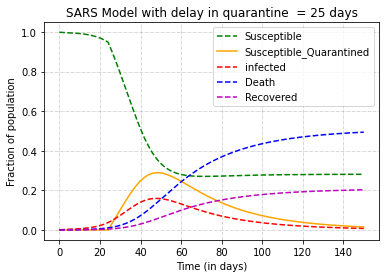

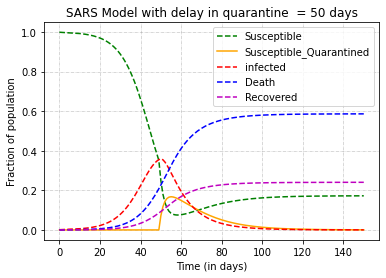

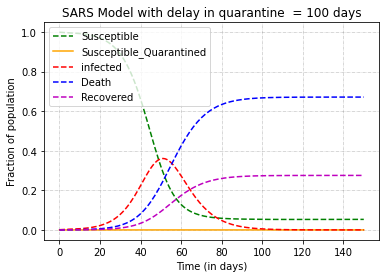

In [18]:
# Q6
b = 0.06 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
q_value= 0.15
k=10

days_values = [25,50,100]

for da in days_values:
        i=0
        t_end = 150
        step_size = 1
        total_steps= int(t_end/step_size)+1 
        
        susceptible = np.zeros(total_steps)
        susceptible_q = np.zeros(total_steps)
        exposed = np.zeros(total_steps)
        exposed_q = np.zeros(total_steps)
        infected_q = np.zeros(total_steps)
        infected_u = np.zeros(total_steps)
        infected_d = np.zeros(total_steps)
        recovered = np.zeros(total_steps)
        death = np.zeros(total_steps)
        total = np.zeros(total_steps)
        N = 10000000
        susceptible[0] = N - 1e4
        infected_u[0] = 1e4

        for i in range(1,total_steps):
                if(i<da):
                    q=0
                else:
                    q=q_value
                
                susceptible[i] = susceptible[i-1] + (u*susceptible_q[i-1] - k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - k*q*b*infected_u[i-1]*susceptible[i-1]/N - k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N)*step_size
                susceptible_q[i] = susceptible_q[i-1] + (k*q*(1-b)*infected_u[i-1]*susceptible[i-1]/N - u*susceptible_q[i-1])*step_size
                exposed[i] = exposed[i-1] + (k*(1-q)*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed[i-1])*step_size
                exposed_q[i] = exposed_q[i-1] + (k*q*b*infected_u[i-1]*susceptible[i-1]/N - p*exposed_q[i-1])*step_size
                infected_u[i] = infected_u[i-1] + (p*exposed[i-1] - m*infected_u[i-1] - v*infected_u[i-1] - w*infected_u[i-1])*step_size
                infected_d[i] = infected_d[i-1] + (w*infected_u[i-1] + w*infected_q[i-1] - v*infected_d[i-1] - m*infected_d[i-1])*step_size
                infected_q[i] = infected_q[i-1] + (p*exposed_q[i-1] - m*infected_q[i-1] - v*infected_q[i-1] - w*infected_q[i-1])*step_size
                death[i] = death[i-1] + m*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
                recovered[i] = recovered[i-1] + v*(infected_u[i-1] + infected_q[i-1] + infected_d[i-1])*step_size
        
        x_axis=np.linspace(0,t_end,total_steps)
        net_ill = exposed/N + exposed_q/N + infected_u/N + infected_q/N + infected_d/N
        
        plt.plot(x_axis,susceptible/N ,'g--',label='Susceptible')
        plt.plot(x_axis,susceptible_q/N,'orange',label='Susceptible_Quarantined')
        plt.plot(x_axis,net_ill,'r--',label='infected')
        plt.plot(x_axis,death/N,'b--',label='Death')
        plt.plot(x_axis,recovered/N,'m--',label='Recovered')
        plt.legend()
        plt.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
        plt.xlabel('Time (in days)')
        plt.ylabel('Fraction of population')
        plt.title('SARS Model with delay in quarantine  = ' + str(round(da,2)) + ' days')
        plt.show()

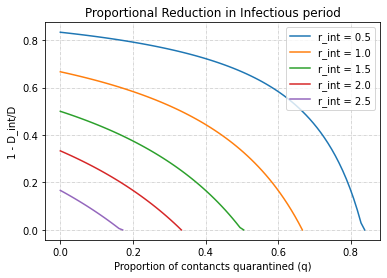

In [14]:
# part c
b = 0.06 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
#q_value= 0.15
k=10

r = k*b/(v+m+w)
# print(r)
r_int = [0.5 ,1.0 ,1.5 ,2.0, 2.5 ]
d_frac = [i/r for i in r_int]
q_values = np.linspace(0,1,100)

for i in r_int:
        d_value = np.zeros(100)
        count = 0
        for q in range(len(q_values)):
                d_value[q] = max(0,1 - i/(r*(1-q_values[q])))
                if d_value[q] == 0:
                        count = q
                        break
        plt.plot(q_values[0:count+1],d_value[0:count+1],label='r_int = '+str(i))
        plt.legend()
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
plt.xlabel('Proportion of contacts quarantined (q)')
plt.ylabel('1 - D_int/D')
plt.title('Proportional Reduction in Infectious period' )
plt.show()